In [2]:
# Stuff
import numpy as np
import cvxpy as cvx
from scipy import sparse
from scipy import signal
from imTools import *
from Taylor08 import *
from convexHullPlot import *
import time
from MuliScaleRep import *
from PIL import ImageFilter
from scipy import interpolate

In [3]:
base = readImage('images/BrainProtonDensitySlice.png')
target = readImage('images/BrainProtonDensitySliceShifted13x17y.png')

(m, n, _) = base.copy().shape

In [4]:
# Downsample by a factor k:
k = 4

def downSample(imName, k):
    
    im = readImage(imName)
    (m, n, _) = im.shape
    
    imDS = readImage(imName, (int(np.floor(n / k)), int(np.floor(m / k))))
    
    return imDS

base = downSample('images/BrainProtonDensitySlice.png', k)
target = downSample('images/BrainProtonDensitySliceShifted13x17y.png', k)
# base = downSample('images/konaResize.png', k)
# target = downSample('images/konaTransform.png', k)
(m, n, _) = base.copy().shape

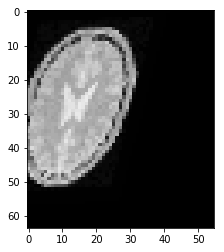

In [8]:
plt.imshow(gaussianDeformImage(base, 10, 4, 1/4*np.random.randn(38)))

In [ ]:
D1 = np.random.randn(m, n) - 13
D2 = np.random.randn(m, n) - 17

D = np.stack((D1, D2), axis = 2)

In [ ]:
from Transforms import displacementTransform

In [ ]:
outim = displacementTransform(base, D)

In [ ]:
plt.imshow(outim)

In [ ]:
plt.imshow(target)

In [ ]:
def firstOrderDeformImage2(im, p):

    # Models and affine transformation

    if len(p) != 6:
        raise Exception('Incorrect number of deformation parameters for Second Order Deformation')

    px = p[:3]
    py = p[3:]

    (rows, cols, _) = im.shape

    displacements = np.zeros([rows, cols, 2])

    for y in range(rows):
        for x in range(cols):
            c = firstOrderD((x,y))
            Dx = np.dot(c, px)
            Dy = np.dot(c, py)
            displacements[y, x] = [-Dx, -Dy]

    return displacementTransform(im, displacements)

def secondOrderDeformImage2(im, p):

    if len(p) != 12:
        raise Exception('Incorrect number of deformation parameters for Second Order Deformation')

    px = p[:6]
    py = p[6:]

    (rows, cols, _) = im.shape

    displacements = np.zeros([rows, cols, 2])

    for y in range(rows):
        for x in range(cols):
            # Note
            c = secondOrderD((x, y))
            Dx = np.dot(c, px)
            Dy = np.dot(c, py)
            # The minuse defines our orientation (down and right is  ++)
            displacements[y, x] = [-Dx, -Dy]

    return displacementTransform(im, displacements)

In [ ]:
plt.imshow(firstOrderDeformImage2(base, [13, 0.00, 0,17, 0.0, 0]))